# Lab 2 - Introduction to _explorationlib_

This section has two goals. 

1. To get you familiar with the python library we will be using for most of the semester to simulate and explore exploration. 
2. To get familiar with running that code online using Google's colaboratory.


Google Colab is a simple free way to run python code. See the _python_ chapter for more on it. Most of the chapters and assignments in this book have a button to open in Colab (see the rocket button at the top). 

## Background

The _explorationlib_ library has three primary parts for running simulations. Here we will outline the three and give a brief explanation for how they work.

### **Agents**

_Agents_ are functions that have a specific set of 1) inputs, 2) computations, and 3) outputs. The input-outut form is defined by the environment (see below). For example, in the bacterial foraging environments the inputs are scent signals reflecting "food" and the ouputs are direction of movement along a 2-dimensional grid. For the bandit environments, the inputs are feedback signals (e.g., rewards) and the outputs are $n$ actions, where $n$ is the number of possible choice options. Agents have an internal _state_ object that is updated according to various algorithms that we will play with in class.


### **Environments**

_Environments_ define the contingencies that agents act on. Here we use the _gym_ library for most of our simulations. There are two classes of environments we will work with: foraging grids and bandits. These will be explained in detail later.

### **Experiment**

The _experiment_ function takes an agent, an environment, and a set of relevant parameters and executes the simulations.

## Section - Setup

Use the button to open this assignment in a colab. Once it is open, if it is open, run all the cells. Read each cell, then run it, that is. This simple test of the colab is also a good but basic introduction to _explorationlib_, which is the basis for all the experiments and assignments you will see.

If there are no errors, celebrate and consider _this_ assignment complete.

_Note:_ I assume that you, reader, are familiar with python programming already. If you are not, see the _Introduction to python_ assignment.

### Install _explorationlib_
Colab's come with many of the libraries we will need. It does not come with _explorationlib_. It's a module we will be using, and was written to support this book. Let's Install it.

In [27]:
!pip install --upgrade git+https://github.com/coaxlab/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git
!pip install celluloid # for the gifs

  Cloning https://github.com/coaxlab/explorationlib to /tmp/pip-req-build-0jutvdej
  Running command git clone --filter=blob:none --quiet https://github.com/coaxlab/explorationlib /tmp/pip-req-build-0jutvdej
  Resolved https://github.com/coaxlab/explorationlib to commit 9b55c9a590a2d7e229a3d7b452fc4347427fa882
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-fm6w1yfr
  Running command git clone --filter=blob:none --quiet https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-fm6w1yfr
  Resolved https://github.com/MattChanTK/gym-maze.git to commit 83176811b49b5538a6213520612f44fb1bc49114
  Preparing metadata (setup.py) ... done


### Import some modules
Let us begin by importing some modules from the standard library. These are just some general purpose tools we will use.

In [28]:
import shutil
import glob
import os
import copy
import sys

Next we can import modules that are common to scientific programming in python.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now let's grab a bunch of functions from _explorationlib_ to play with. If our install using _pip_ above worked out, this next cell should run without error.

In [30]:
# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib import agent

# The environments we will simulate live in a "gym"
from explorationlib import local_gym as gym

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
#from explorationlib.plot import render_2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import total_reward
#from explorationlib.score import average_reward

Before we go too far, let's do some work to make the plots look nicer.  We don't _have_ to do this, but having clear data visualization helps us better understand our results.

In [31]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

Finally, let's set up some better autocomplete and development tools in our notebooks. Again, optional. If this errors out, you might consider skipping it.

In [1]:
# config IPCompleter.greedy=True
# load_ext autoreload
# autoreload 2

### Make a space for the data
Make a folder called "data" to keep experimental data in. We will use it for all our examples.

**WARNING** When running in a colab, anything you save to "data/" will be lost as soon as you shutdown the colab. This is ok for now. We will cover ways to save your data permanently later on.

In [ ]:
if not os.path.exists("data"):
    os.makedirs("data")

## Section 1 - Let's make some bacteria!

We want to run a simple experiment using _explorationlib_. We will simulate a simple bacteria agent wandering a small environment with "food" resources that are detectable by scents (though our toy animal has no sensory abilities yet).

1. Instantiate a random walker, in a small 2d box environment, with walls and a lot of targets to find when exploring. Each target should have a value of '1'.
2. Run an experiment, for 200 steps.
3. Plot the env, target, the agents path in the experiment.
4. Make a movie of experiment.
5. Score the agent, and reward (targets), and its efficiency.

#### Instantiate

In [32]:
# Parameters
exp_name = "data/explorationlib_a1.pkl"   # all experiments need names
num_experiments = 1             # we only want to run one experiment
num_steps = 200                 # how many exploration steps in space?

scale = 2             # The noise scale; the diffusion constant
detection_radius = 1  # How far can the agent see?
boundary = (10, 10)   # a 2d world, 10 by 10
mode = "stopping"     # stop when we hit a wall
num_targets = 100     # how many thingss to "eat"?

# Setup targets. Targets are an abstraction for the
# thing we are exploring to find. For now, all targets
# are just the number 1 placed randomly about.
targets = gym.uniform_targets(num_targets, boundary)
values = gym.constant_values(targets, 1)

# Setup agent and env
env = gym.Bounded(boundary=boundary, mode=mode)
env.add_targets(targets, values)
brownian = agent.Diffusion2d(scale=scale)

#### Run

(If you've been playing with this notebook for a while, then clear the old output first.)

In [33]:
# Cleanup old versions
for path in glob.glob(f"{exp_name}"):
    os.remove(path)

In [41]:
# Run!
exp_data = experiment(
    f"brownian",
    brownian,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)

brownian:   0%|          | 0/1 [00:00<?, ?it/s]

#### Plot

<Axes: title={'center': 'Simple box'}, xlabel='x', ylabel='y'>

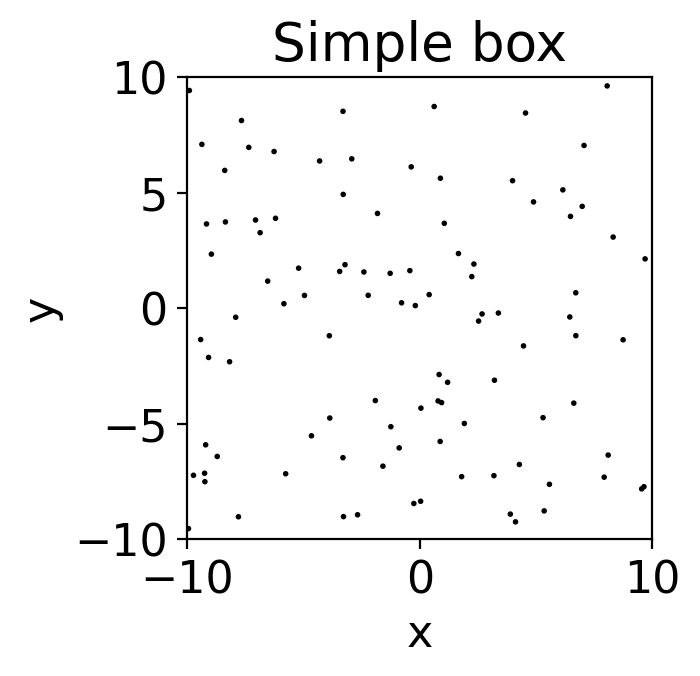

In [42]:
# Plot the 2d env, and the targets (black dots)
plot_targets2d(env, boundary=boundary, title="Simple box", figsize=(3,3))

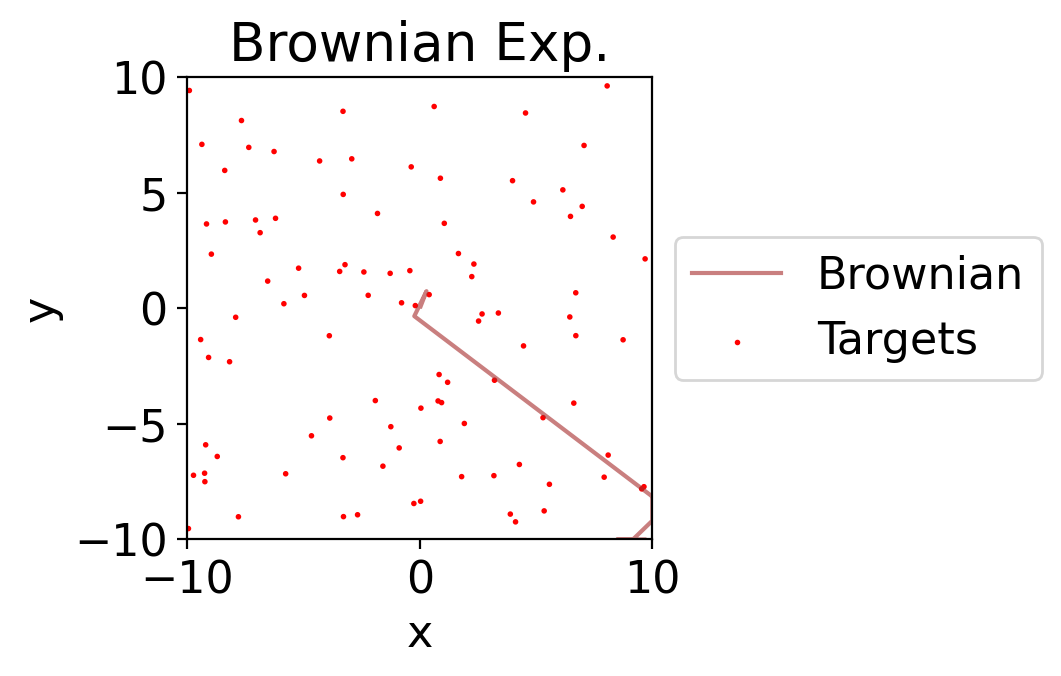

In [43]:
# Plot the positions the agent took during its
# random walk, and the targets (this time in red)
#
# Note: there are quite a few parameters you can play
# with to change the size of the plot, colors, and so on.
# See `explorationlib.plot` for all the options

# View size
plot_boundary = (20, 20)

# Agent
ax = None
ax = plot_position2d(
    select_exp(exp_data,0),
    boundary=plot_boundary,
    label=f"Brownian",
    title=f"Brownian Exp.",
    color="brown",
    alpha=0.6,
    ax=None,
)

ax = plot_targets2d(
    env,
    boundary=boundary,
    color="red",
    alpha=1,
    label="Targets",
    ax=ax,
)

#### Score

Now we can quantify our animal's behavior.

In [37]:
# Total rewards (targets) collected
total_reward(exp_data)

total_reward:   0%|          | 0/1 [00:00<?, ?it/s]

[110.0]

In [38]:
# How efficient (movements/target) was the search
search_efficiency(exp_data)

search_efficiency:   0%|          | 0/1 [00:00<?, ?it/s]

[5.527638190954771]


Nwo go back to the top of this section, change the random seed number in the cell where we ran the experiment, and run it again. Each time you do you should generate a new exploration. You'll get different rewards and efficiency each time as well.



### Question 1.1 

How much variation do you see from run to run? More to the point, if this was how you _had_ to explore the world, how well do you think you'd do?

In [2]:
# Write your answer here as a comment. Explain yourself.